# Rate based analysis of ring network

We have a network of $N$ excitatory neurons arranged in a ring - each has internal voltage $v$ which gives rise to a firing rate $r$ based on the firing rate curve 

$$\phi_E(v) = \rho_E \Theta(v - \theta_E)$$

Where $\rho_E$ is the response gradient, $\Theta$ is the Heaviside function, and $\theta_E$ is a threshold voltage under which the neuron never fires.

The network also has inhibitory neurons which are assumed to act on a much faster timescale than the excitatory neurons and hence have no internal variable. Their response is based on the instantaneous mean excitatory population neuron voltage (should this be output??)

$$I = \phi_I(v) = \rho_I \Theta(\bar v - \theta_I)$$

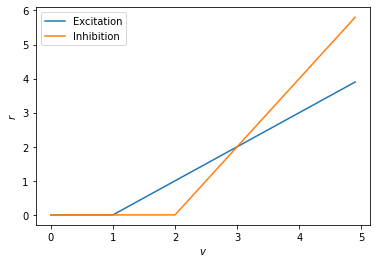

In [24]:
import matplotlib.pyplot as plt
import numpy as np

rho_E = 1
theta_E = 1
rho_I = 2
theta_I = 2

heaviside = lambda x: np.maximum(0,x)
phi_E = lambda v: rho_E * heaviside(v - theta_E)
phi_I = lambda v: rho_I*heaviside(v - theta_I)

v = np.arange(0,5,0.1)
plt.plot(v, phi_E(v), label='Excitation')
plt.plot(v, phi_I(v), label='Inhibition')
plt.legend()
plt.xlabel('$v$')
plt.ylabel('$r$')
plt.show()

The excitatory neurons are of the leaky integrate and fire (LIF) type, with the following update equation

$$\dot v_i = -v_i + \sum_j w_{ji} \phi_E(v_j) - I$$

Collecting all update equations into matrix form

$$\dot v = -v + W\phi_E(v) - I$$

We assume that the network operates in the linear firing regime above the nonlinearity ($v_i \geq \theta_E \forall i$), so we can expand the neuron response function as follows

$$\dot v = -v + W\rho_E(v - \theta_E) - I$$

The neuron population is arranged around a ring, so we suppose that connection weights are circularly symmetric around this ring, just depending on the circular distance between two neurons. The weight matrix, $W$, is therefore circulant and we can express the matrix multiplication as a convolution with the activity profile, $v$.

$$\dot v = -v + w \ast \rho_E(v - \theta_E) - I$$

To find the steady states of the system:

$$\begin{align*}
	\dot v &= 0 \\
	\therefore v &= w \ast \rho_E(v - \theta_E) - I
\end{align*}$$

Since $I$ is constant for all neurons in the network (global inhibition), to find stable solutions we are looking for pairs of $(v,w)$ such that $w \ast \rho_E(v - \theta_E)$ is of the same form as $v$, with a constant offset

## Case 1: Cosine

One possible solution is for $w$ and $v$ to both be sinusoid functions of the same frequency. The convolution of the two will then be a sinusoid of the same frequency. We assume that the weights have 0 phase offset so that the phase of $v$ will be preserved.

Assuming the following forms for $v$ and $w$

$$\begin{align*}
	v &= \bar v + A \cos(2\pi i / N + \psi_v) \\
	w &= \bar w + B \cos(2\pi i / N) \\
\end{align*}$$

The steady state activity is therefore at

$$\begin{align*}
	v &= w \ast \rho_E(v - \theta_E) - \rho_I(\bar v - \theta_I) \\
	&= \left[\bar w + B \cos(2\pi i / N)\right] \ast \left[\rho_E(\bar v + A \cos(2\pi i / N + \psi_v) - \theta_E)\right] - \rho_I(\bar v - \theta_I) \\
	&= \bar w \ast \rho_E(\bar v - \theta_E) + \bar w \ast \rho_E A \cos(2\pi i / N + \psi_v) 
	+ B \cos(2\pi i / N) \ast \rho_E(\bar v - \theta_E) + B \cos(2\pi i / N) \ast \rho_E A \cos(2\pi i / N + \psi_v) 
	- \rho_I(\bar v - \theta_I)
\end{align*}$$

Given that we are performing convolution over the period $[0,N)$:

$$\begin{align*}
	k_1 \ast k_2 &= k_1 k_2 N \\
	k \ast \cos(2\pi t/N) &= 0 \\
	A \cos(2\pi t/N) \ast B\cos(2\pi t/N) &= \frac{ABN}{2} \cos(2\pi t/N)
\end{align*}$$

Therefore

$$\begin{align*}
	v &= N \bar w \rho_E(\bar v - \theta_E) + \frac{ABN \rho_E}{2} \cos(2\pi i / N + \psi_v) - \rho_I(\bar v - \theta_I) \\
	&= \frac{ABN \rho_E}{2} \cos(2\pi i / N + \psi_v) + N \bar w \rho_E(\bar v - \theta_E) - \rho_I(\bar v - \theta_I)
\end{align*}$$

To match the presupposed form of $v$

$$\begin{align*}
	A &= \frac{ABN \rho_E}{2} \\
	\therefore B &= \frac{2}{N \rho_E} \\
	\bar v &= N \bar w \rho_E(\bar v - \theta_E) - \rho_I(\bar v - \theta_I) \\
	\therefore (1 + \rho_I - N\bar w \rho_E) \bar v &= N\bar w \rho_E\theta_E - \rho_I\theta_I \\
	\bar v &= \frac{N\bar w \rho_E\theta_E - \rho_I\theta_I}{1 + \rho_I - N\bar w \rho_E}
\end{align*}$$

These relations place no constraint on the amplitude of the cosine wave (other than our assumption that $v_i \geq \theta_E \forall i$)

## Case 2: Constant input, cosine weight

Actually this is covered by the cosine case with amplitude of 0

Assuming the following forms for $v$ and $w$

$$\begin{align*}
	v &= \bar v \\
	w &= \bar w + B \cos(2\pi i / N) \\
\end{align*}$$

The steady state activity is therefore at

$$\begin{align*}
	v &= w \ast \rho_E(\bar v - \theta_E) - \rho_I(\bar v - \theta_I) \\
	&= \left[\bar w + B \cos(2\pi i / N)\right] \ast \left[\rho_E(\bar v - \theta_E)\right] - \rho_I(\bar v - \theta_I) \\
	&= \bar w \ast \rho_E(\bar v - \theta_E)
	+ B \cos(2\pi i / N) \ast \rho_E(\bar v - \theta_E) - \rho_I(\bar v - \theta_I) \\
	&= N \bar w \rho_E(\bar v - \theta_E) - \rho_I(\bar v - \theta_I) \\
	&= (N \bar w \rho_E - \rho_I) \bar v + \rho_I\theta_I - N \bar w \rho_E\theta_E
\end{align*}$$

In this case, we don't have any constraints on the amplitude of the weight cosine either

## Case 3: Gaussian

If we assume both the activity and weights are Gaussians, then the convolution of the two will be a Gaussian with variance equal to the sum of the activity and weight variances. This cannot then be of the same form as the original activity (except in the case that the weight variance is 0 - ie. a dirac delta identity matrix). Therefore, for Gaussian activity the weight matrix must be of a different form

## Computing total excitation and inhibition in the network

The total excitation in the network for a cosine activity pattern is the sum of excitatory inputs for each neuron

$$\begin{align*}
	E_T &= \sum w \ast \rho_E(v - \theta_E) \\
	&= \sum_i N \bar w \rho_E(\bar v - \theta_E) + \frac{ABN \rho_E}{2} \cos(2\pi i / N + \psi_v) \\
	&= N^2 \bar w \rho_E(\bar v - \theta_E)
\end{align*}$$

Because $\sum_{i=0}^{N-1} \cos(2\pi i/N) = 0~\text{if}~N > 1$

The total inhibition in the network is

$$\begin{align*}
	I_T &= \sum v_i + \rho_I(\bar v - \theta_I) \\
	&= N\bar v + N\rho_I(\bar v - \theta_I)
\end{align*}$$

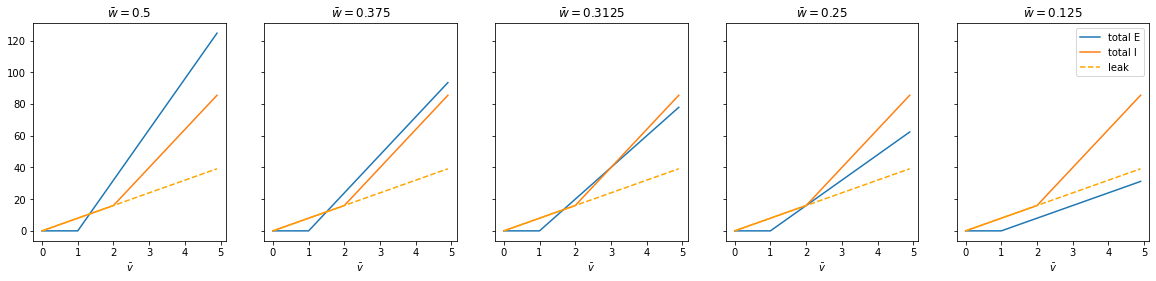

In [21]:
N = 8
v_mean = 3

w_means = [1/2, 3/8, 5/16, 1/4, 1/8]
fig, axs = plt.subplots(1,len(w_means),sharey=True,figsize=(4*len(w_means),4))
assert(isinstance(axs, np.ndarray))
for w_mean,ax in zip(w_means,axs):
	ax.plot(v, N**2*w_mean*phi_E(v), label='total E')
	ax.plot(v, N*(phi_I(v) + v), label='total I')
	ax.plot(v, N*v, '--', color='orange', label='leak')
	ax.set_title(fr'$\bar w = {w_mean}$')
	ax.set_xlabel(r'$\bar v$')
plt.legend()
plt.show()

Depending on the parameters, there can be either 2 fixed points (1 stable), 3 fixed points (2 stable), 2 fixed points (both stable), or only 1 fixed point (stable)

To have the nonzero stable fixed point, the point where the inhibition curve changes must be below the excitatory curve at this point and the gradient of the inhibitory curve after the point must be greater than the excitatory curve gradient.

For the first of these conditions

$$\begin{align*}
	N\theta_I &\leq N^2 \bar w \rho_E(\theta_I - \theta_E) \\
	\bar w &\geq \frac{\theta_I}{N \rho_E(\theta_I - \theta_E)}
\end{align*}$$

and for the second

$$\begin{align*}
	N + N\rho_I &> N^2 \bar w \rho_E \\
	\bar w &< \frac{1+\rho_I}{N \rho_E}
\end{align*}$$